# Importing Essential Libraries

In [1]:
#importing packages
import pandas as pd # for dataframe
import numpy as np  # for algebric 
import nltk         #for nlp 
import matplotlib.pyplot as plt # for visualization
import seaborn as sns           # for visualization

In [2]:
# Importing csv files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train[:5]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
test[:2]

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."


In [4]:
# viewing each unique values in each columns
for i in train.columns:
    print('Column Name  :',i)
    print(train[i].unique())

Column Name  : id
[    1     4     5 ... 10871 10872 10873]
Column Name  : keyword
[nan 'ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew%20up' 'blight'
 'blizzard' 'blood' 'bloody' 'blown%20up' 'body%20bag' 'body%20bagging'
 'body%20bags' 'bomb' 'bombed' 'bombing' 'bridge%20collapse'
 'buildings%20burning' 'buildings%20on%20fire' 'burned' 'burning'
 'burning%20buildings' 'bush%20fires' 'casualties' 'casualty'
 'catastrophe' 'catastrophic' 'chemical%20emergency' 'cliff%20fall'
 'collapse' 'collapsed' 'collide' 'collided' 'collision' 'crash' 'crashed'
 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger' 'dead' 'death'
 'deaths' 'debris' 'deluge' 'deluged' 'demolish' 'demolished' 'demolition'
 'derail' 'derailed' 'derailment' 'desolate' 'desolation' 'destroy'
 'destroyed' 'destruction

# Data Cleaning

In [5]:
# id is not essential. so, i'm droping it
df_train = train.drop(['id'],axis=1)
df_test = test.drop(['id'],axis=1)

In [6]:
#Hence when it comes twitter, Hashtag is one of important thing. so, i'm created new column contains only hashtags
# for this i used regrx package.
import re
df_train['Hashtag'] = df_train['text'].map(lambda x: re.findall(r'#(\w+)',x)).apply(lambda x: ", ".join(x))
df_test['Hashtag'] = df_test['text'].map(lambda x: re.findall(r'#(\w+)',x)).apply(lambda x: ", ".join(x))
df_train['@'] = df_train['text'].map(lambda x: re.findall(r'@(\w+)',x)).apply(lambda x: ", ".join(x))
df_test['@'] = df_test['text'].map(lambda x: re.findall(r'@(\w+)',x)).apply(lambda x: ", ".join(x))

# data Cleaning
# i'm defining function to clean data. it will make work easier
def remove_punctuation(txt):
    import string
    result = txt.translate(str.maketrans('','',string.punctuation))
    return result
def lower_text(txt):
    return txt.lower()
def remove_no(txt):
    import re
    return re.sub(r"\d+","",txt)
def remove_html_tags(text):
    """Remove html tags from a string"""
    import re
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
def removeurl(txt):
    import re
    return re.sub(r'http?\S+|www\.\S+', '',txt)

# defining all function to one for this problem
def norm(txt):
    x = remove_punctuation(txt)
    x = lower_text(x)
    x = remove_html_tags(x)
    x = remove_no(x)
    x = removeurl(x)
    return x

# applying data cleaning function for text
df_train['text'] = df_train['text'].map(lambda x:  norm(x))
df_test['text'] = df_test['text'].map(lambda x:  norm(x))

#There are some magic words "%20" which indicates space in this data.so,Removing magic words
df_train['keyword'] = df_train['keyword'].map(lambda s: s.replace('%20',' ') if isinstance(s, str) else s)
df_test['keyword'] = df_test['keyword'].map(lambda s: s.replace('%20',' ') if isinstance(s, str) else s)

In [7]:
# Cleaned Data
df_test
df_train[:5]

,keyword,location,text,target,Hashtag,@
0,NaN,NaN,our deeds are the reason of this earthquake ma...,1,earthquake,
1,NaN,NaN,forest fire near la ronge sask canada,1,,
2,NaN,NaN,all residents asked to shelter in place are be...,1,,
3,NaN,NaN,people receive wildfires evacuation orders in...,1,wildfires,
4,NaN,NaN,just got sent this photo from ruby alaska as s...,1,"Alaska, wildfires",


Twitts has Hash Tag.

# Splitting data to view word distribution

In [8]:
#Seperating data to explore it
train_yes = df_train[df_train["target"]==1]
train_no = df_train[df_train["target"]==0]
train_yes[:5]

,keyword,location,text,target,Hashtag,@
0,NaN,NaN,our deeds are the reason of this earthquake ma...,1,earthquake,
1,NaN,NaN,forest fire near la ronge sask canada,1,,
2,NaN,NaN,all residents asked to shelter in place are be...,1,,
3,NaN,NaN,people receive wildfires evacuation orders in...,1,wildfires,
4,NaN,NaN,just got sent this photo from ruby alaska as s...,1,"Alaska, wildfires",


In [9]:
# created a para from all text for each target
# Sepereate Data to two 
train_txt_yes = " ".join(str(i) for i in train_yes['text'])
train_txt_no = " ".join(str(i) for i in train_no['text'])
test_txt = " ".join(str(i) for i in df_test['text'])
#train_txt_yes

In [10]:
#replacing empty space with null values
train_yes["Hashtag"]= train_yes["Hashtag"].replace(r'^\s*$', np.nan, regex=True)
train_no["Hashtag"]= train_yes["Hashtag"].replace(r'^\s*$', np.nan, regex=True)
train_yes["@"]= train_yes["@"].replace(r'^\s*$', np.nan, regex=True)
train_no["@"]= train_yes["@"].replace(r'^\s*$', np.nan, regex=True)
#train_yes["Hashtag"].isnull().sum()

C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [46]:
print("Total No. of disaster tweets                        :",train_yes["text"].count())
print("Total No. of hashtag present in disaster tweets     :",train_yes["Hashtag"].notnull().sum())
print("Total No. of non-disaster tweets                    :",train_no["text"].count())
print("Total No. of hashtag present in non-disaster tweets :",train_no["Hashtag"].notnull().sum(),"\n")

print("Total No. of disaster tweets                  :",train_yes["text"].count())
print("Total No. of @ present in disaster tweets     :",train_yes["@"].notnull().sum())
print("Total No. of non-disaster tweets              :",train_no["text"].count())
print("Total No. of @ present in non-disaster tweets :",train_no["@"].notnull().sum())

Total No. of disaster tweets                        : 3271
Total No. of hashtag present in disaster tweets     : 858
Total No. of non-disaster tweets                    : 4342
Total No. of hashtag present in non-disaster tweets : 0 

Total No. of disaster tweets                  : 3271
Total No. of @ present in disaster tweets     : 666
Total No. of non-disaster tweets              : 4342
Total No. of @ present in non-disaster tweets : 0


#### From this, we can't find disaster tweets. because hashtag & @ count is not present in non-disaster tweets.

In [48]:
#data in keywords & Location columns
print("Total No. of Keyword                                 :",train_yes["keyword"].count())
print("Total No. of disaster tweets                         :",train_yes["text"].count())
print("Total No. of Keywords present in disaster tweets     :",train_yes["keyword"].notnull().sum())
print("Total No. of non-disaster tweets                     :",train_no["text"].count())
print("Total No. of Keywords present in non-disaster tweets :",train_no["keyword"].notnull().sum(),"\n")

print("Total No. of disaster tweets                         :",train_yes["text"].count())
print("Total No. of Location present in disaster tweets     :",train_yes["location"].notnull().sum())
print("Total No. of non-disaster tweets                     :",train_no["text"].count())
print("Total No. of Location present in non-disaster tweets :",train_no["location"].notnull().sum())

Total No. of Keyword                                 : 3229
Total No. of disaster tweets                         : 3271
Total No. of Keywords present in disaster tweets     : 3229
Total No. of non-disaster tweets                     : 4342
Total No. of Keywords present in non-disaster tweets : 4323 

Total No. of disaster tweets                         : 3271
Total No. of Location present in disaster tweets     : 2196
Total No. of non-disaster tweets                     : 4342
Total No. of Location present in non-disaster tweets : 2884


#### From this, we nedd to consider Keyword data because disaster tweets contains keywords 

### Tokenization & Lemminization

In [12]:
# deffining function for tokenization & lemmatize.
# Tokenization function
def Token_and_removestopword(txt):
    import nltk
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words("english"))
    words = nltk.word_tokenize(txt)
    without_stop_words = []
    for word in words:
        if word not in stop_words:
            without_stop_words.append(word)
    return without_stop_words
#lemmatizing tokenized words
def lemmatize_word(tokens,pos="v"): 
    import nltk
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    # provide context i.e. part-of-speech 
    lemmas = [lemmatizer.lemmatize(word, pos =pos) for word in tokens] 
    return lemmas

In [13]:
tok_yes = Token_and_removestopword(train_txt_yes)
tok_no = Token_and_removestopword(train_txt_no)
test_tok = Token_and_removestopword(test_txt)
tok_yes[:5]

['deeds', 'reason', 'earthquake', 'may', 'allah']

In [14]:
#lem_wd = [lemmatizer.lemmatize(x, pos ='v') for x in tok]
lem_tok_yes = lemmatize_word(tok_yes)
lem_tok_no = lemmatize_word(tok_no)
lem_test = lemmatize_word(test_tok)
print(len(tok_yes))
print(len(lem_tok_yes))

31384
31384


## Data Visualizing

In [15]:
def top_word_dis(lem_tok,TopN=10):
    fq = nltk.FreqDist(lem_tok)
    rslt = pd.DataFrame(fq.most_common(TopN),
                        columns=['Word', 'Frequency']).set_index('Word')
    plt.style.use('ggplot')
    rslt.plot.bar()

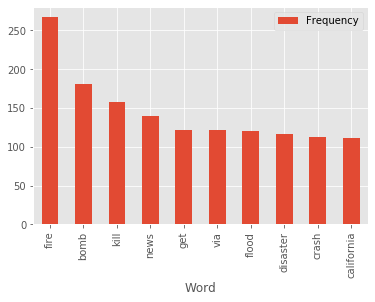

In [16]:
top_word_dis(lem_tok_yes)

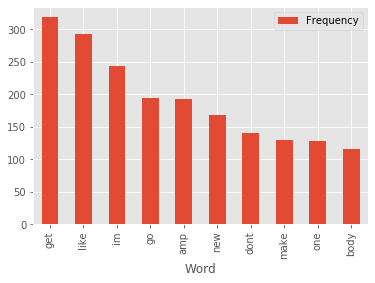

In [17]:
top_word_dis(lem_tok_no)

In [18]:
print(lem_test[:10])

['happen', 'terrible', 'car', 'crash', 'hear', 'earthquake', 'different', 'cities', 'stay', 'safe']


# Defining Functions

In [50]:
#TF-IDF Vectorizer
def tfidf(train_int,test_int=None,Ngram_min=1,Ngram_max=1):
    import pandas as pd
    from sklearn.feature_extraction.text import TfidfVectorizer
    #to convert token input into text
    def toktotxt(txt_int):
        if isinstance(txt_int[0], list):
            text = txt_int.apply(lambda x :" ".join(str(i) for i in x))
        else:
            text = txt_int
        return text
    train_txt = toktotxt(train_int)  
    vectorizer = TfidfVectorizer(ngram_range = (Ngram_min,Ngram_max))
    vectorizer.fit(train_txt)
    X = vectorizer.transform(train_txt)
    train = X.toarray()
    # to get both transform for train & split
    if test_int is None:
        out = train
    else:
        test_txt = toktotxt(test_int)
        Y = vectorizer.transform(test_txt)
        test = Y.toarray()
        out = train, test
    return out

"""
Above step is not necessary. you can also use below step
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(train_data)
vectorizer.transform(train_data)  ---> output as array
vectorizer.transform(test_data) ---> essential if you has test data & to change its shape for further process
"""
print("")

In [20]:
def countvectorizer(train_int,test_int=None,Ngram_min=1,Ngram_max=1):
    import pandas as pd
    from sklearn.feature_extraction.text import CountVectorizer
    def toktotxt(txt_int):
        if isinstance(txt_int[0], list):
            text = txt_int.apply(lambda x :" ".join(str(i) for i in x))
        else:
            text = txt_int
        return text
    train_txt = toktotxt(train_int)  
    vectorizer = CountVectorizer(ngram_range = (Ngram_min,Ngram_max))
    vectorizer.fit(train_txt)
    X = vectorizer.transform(train_txt)
    train = X.toarray()
    if test_int is None:
        out = train
    else:
        test_txt = toktotxt(test_int)
        Y = vectorizer.transform(test_txt)
        test = Y.toarray()
        out = train, test
    return out

"""
same as for tdidf
"""

'\nsame as for tdidf\n'

In [21]:
#Dimentional Reduction
def PCA(X_train,Y_train=None,X_test=None,n=1000):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=n)
    X = pca.fit(X_train,y_train)
    train = pca.transform(X_train)
    if X_test.any() == None:
        out = train
    else:
        test = pca.transform(X_test)
        out = train, test
    return out

In [22]:
# ML Algorithms
def logreg(X_train, y_train,X_test,n=20):
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return preds
def naivebiase(X_train, y_train,X_test,n=20):
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return preds
def accuracy(y_true, y_pred):
    from sklearn.metrics import accuracy_score
    return accuracy_score(y_true, y_pred)

# ML Models - Test Train

In [77]:
# Cleaned Data
df_test
df_train[:5]

,keyword,location,text,target,Hashtag,@,tokenized_text,txt&key
0,,NaN,our deeds are the reason of this earthquake ma...,1,earthquake,,"[deeds, reason, earthquake, may, allah, forgiv...",our deeds are the reason of this earthquake ma...
1,,NaN,forest fire near la ronge sask canada,1,,,"[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,,NaN,all residents asked to shelter in place are be...,1,,,"[residents, ask, shelter, place, notify, offic...",all residents asked to shelter in place are be...
3,,NaN,people receive wildfires evacuation orders in...,1,wildfires,,"[people, receive, wildfires, evacuation, order...",people receive wildfires evacuation orders in...
4,,NaN,just got sent this photo from ruby alaska as s...,1,"Alaska, wildfires",,"[get, send, photo, ruby, alaska, smoke, wildfi...",just got sent this photo from ruby alaska as s...


In [78]:
df_train["keyword"] = df_train["keyword"].fillna("")

In [79]:
# Replacing null value 
df_train["keyword"] = df_train["keyword"].fillna("")
df_test["keyword"] = df_test["keyword"].fillna("")

# combaining both text & keywords
df_train["txt&key"] = df_train[['text', 'keyword']].apply(lambda x: ' '.join(x), axis=1)
df_test["txt&key"] = df_test[['text', 'keyword']].apply(lambda x: ' '.join(x), axis=1)

In [80]:
#apply tokenization & lemmatization to each text
df_train["tokenized_text"] = df_train["txt&key"].apply(lambda x:lemmatize_word(Token_and_removestopword(x)))
df_test["tokenized_text"] = df_test["txt&key"].apply(lambda x:lemmatize_word(Token_and_removestopword(x)))
df_train[:5]

,keyword,location,text,target,Hashtag,@,tokenized_text,txt&key
0,,NaN,our deeds are the reason of this earthquake ma...,1,earthquake,,"[deeds, reason, earthquake, may, allah, forgiv...",our deeds are the reason of this earthquake ma...
1,,NaN,forest fire near la ronge sask canada,1,,,"[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,,NaN,all residents asked to shelter in place are be...,1,,,"[residents, ask, shelter, place, notify, offic...",all residents asked to shelter in place are be...
3,,NaN,people receive wildfires evacuation orders in...,1,wildfires,,"[people, receive, wildfires, evacuation, order...",people receive wildfires evacuation orders in...
4,,NaN,just got sent this photo from ruby alaska as s...,1,"Alaska, wildfires",,"[get, send, photo, ruby, alaska, smoke, wildfi...",just got sent this photo from ruby alaska as s...


## Vectorization
converting into numeric formate
* Tf-IDF
* Countvectorizer

In [81]:
"""
for vectorization in countervector & tfidf the input be in text formate.
that's why i join all text in list in above mentioned function.
"""
tfidf_train,tfidf_test = tfidf(df_train["tokenized_text"],df_test["tokenized_text"])
cnt_train,cnt_test = countvectorizer(df_train["tokenized_text"],df_test["tokenized_text"])

In [82]:
#check whether shape aligns or not
print(tfidf_train.shape)
print(cnt_train.shape)
print(df_train["target"].shape)

(7613, 14976)
(7613, 14976)
(7613,)


# TF-IDF

In [87]:
# test & train Split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=tfidf_train
y=df_train["target"]
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.1,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6851, 14976)
(762, 14976)
(6851,)
(762,)


In [84]:
# dimentionality reduction ---> it is not necessary for this problem. because it is very small data
#x_train,x_test = PCA(x_train,y_train,x_test,n=500)

In [88]:
# prediction using logistic regression model. it is defined as function above
preds = logreg(x_train, y_train,x_test)
accuracy(y_test,preds)

C:\Users\Anand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7729658792650919

In [89]:
#prediction using naivebiase Gaussian model. it is defined as function above
preds = naivebiase(x_train, y_train,x_test)
accuracy(y_test,preds)

0.615485564304462

# CounterVectorizer

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=cnt_train
y=df_train["target"]
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.1,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6851, 14976)
(762, 14976)
(6851,)
(762,)


In [32]:
x_train,x_test = PCA(x_train,y_train,x_test,n=500)

In [91]:
preds = logreg(x_train, y_train,x_test)
accuracy(y_test,preds)

C:\Users\Anand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7795275590551181

In [92]:
preds = naivebiase(x_train, y_train,x_test)
accuracy(y_test,preds)

0.6181102362204725

### Insights:
Both Vectorizer provides same accuracy.
hence logistic regression model provides high accuracy than naive bayes

# Test Data

In [93]:
x_train = cnt_train
y_train = df_train["target"] 
x_test = cnt_test

In [94]:
# check wheather shape alligns or not
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(7613, 14976)
(7613,)
(3263, 14976)


In [37]:
#if shape is not aligned check wheather do you transform test data in vectorization part or not.
#if test data is not transformed as per train data it may led to error due to mismatch in features.
x_train,x_test = PCA(x_train,y_train,x_test,n=500)

In [95]:
preds = logreg(x_train,y_train,x_test)

C:\Users\Anand\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [96]:
preds

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

## Submmision

In [97]:
submission = test[["id"]]
submission["target"] = preds

C:\Users\Anand\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
submission[:5]

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1


In [42]:
submission.to_csv("submission.csv",index=False)

# Thanks for viewing this kernal.  Its my first kernal on NLP in Kaggle :)